# New Apprentice Python Project 
**Using the appleAppData data set found on Kaggle! https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps** 

```python
Business Questions :
1. What is the average rating of the FREE and NON-FREE apps
2. What are the average ratings of common genres (gaming, business, navigation, etc)?
3. What is the average, minimum and max price of gaming apps?
```


##### Importing Libraries, Opening the dataset and cleaning it


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('appleAppData.csv')
df_main = df.dropna()

Showing the dataset information and displaying a small table of the data

In [73]:
## Displaying data set information
df_main.info()

## Showing a small table of some of the data I will be analyzing
df_table = df_main[['Primary_Genre', 'Average_User_Rating', 'Free']]
df_table.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585721 entries, 4 to 1230374
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   App_Id                   585721 non-null  object 
 1   App_Name                 585721 non-null  object 
 2   AppStore_Url             585721 non-null  object 
 3   Primary_Genre            585721 non-null  object 
 4   Content_Rating           585721 non-null  object 
 5   Size_Bytes               585721 non-null  float64
 6   Required_IOS_Version     585721 non-null  object 
 7   Released                 585721 non-null  object 
 8   Updated                  585721 non-null  object 
 9   Version                  585721 non-null  object 
 10  Price                    585721 non-null  float64
 11  Currency                 585721 non-null  object 
 12  Free                     585721 non-null  bool   
 13  DeveloperId              585721 non-null  int64  
 14  Dev

,Primary_Genre,Average_User_Rating,Free
4,Reference,0.00000,True
7,Book,0.00000,True
9,News,0.00000,True
11,Book,4.78902,True
13,Book,3.09524,False
14,Book,3.88333,False
15,Book,4.13253,False
18,Book,3.00000,True
21,Games,5.00000,True
23,Games,0.00000,False


# Creating a function to find the average of free and paid apps!

Creating the app_rating function to itterate through free and paid apps

In [ ]:
def app_ratings():
    global free_apps, paid_apps
    free_apps = []
    paid_apps = []

    for index, row in df_main.iterrows():
        if row[17] > 0:
            rating = row[17]
            free_checker = row[12]
            if free_checker == True:
                free_apps.append(rating)
            else: 
                paid_apps.append(rating)

Creating an average finder function for lists to keep code cleaner. Calling app_ratings function to create a graph of the data found!


In [ ]:
           
## Create a function to find the average of ratings and return that value
def average_for_lists(sum_list, len_list):
    average = round(sum(sum_list) / len(len_list), 4)
    return average


app_ratings() ##Calling my loop function to find the ratings from free and paid apps

free_paid_graph_dict = {'Free or Paid': ['Free', 'Paid'],
                    'Average Rating':[average_for_lists(free_apps, free_apps), average_for_lists(paid_apps, paid_apps)]}

free_paid_df = pd.DataFrame(free_paid_graph_dict)

## Graphing the dataframe
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15
free_paid_graph = free_paid_df.plot(figsize = (20, 10),
            color = ['lightgreen', 'skyblue'],
            kind = 'bar',
            legend = False,
            x = 'Free or Paid',
            y = 'Average Rating',
            title = 'Average Rating of Free and Paid Apps',
            edgecolor = 'black')
free_paid_graph.bar_label(free_paid_graph.containers[0]) #shows the value of the bars

# **Average Ratings of Common Genres**

In [71]:
def genre_ratings(g1, g2, g3):
    global genre1_list, genre2_list, genre3_list, inp1, inp2, inp3
    # Saving category inputs as user inputs to use in graph
    inp1 = g1
    inp2 = g2
    inp3 = g3
    # Sets the value of user category to data column
    #genre1 = df_main.loc[df_main['Primary_Genre'] == g1]
    #genre2 = df_main.loc[df_main['Primary_Genre'] == g2]
    #genre3 = df_main.loc[df_main['Primary_Genre'] == g3]

    genre1_list = []
    genre2_list = []
    genre3_list = []

    for index, row in df_main.iterrows():
        rating = row[17]
        genre_checker = row['Primary_Genre']
        if genre_checker == g1 and row[17] > 0.0:
            genre1_list.append(rating)
        elif genre_checker == g2 and row[17] > 0.0:
            genre2_list.append(rating)
        elif genre_checker == g3 and row[17] > 0.0:
            genre3_list.append(rating)

[Text(0, 0, '3.967'), Text(0, 0, '3.8129'), Text(0, 0, '4.1064')]

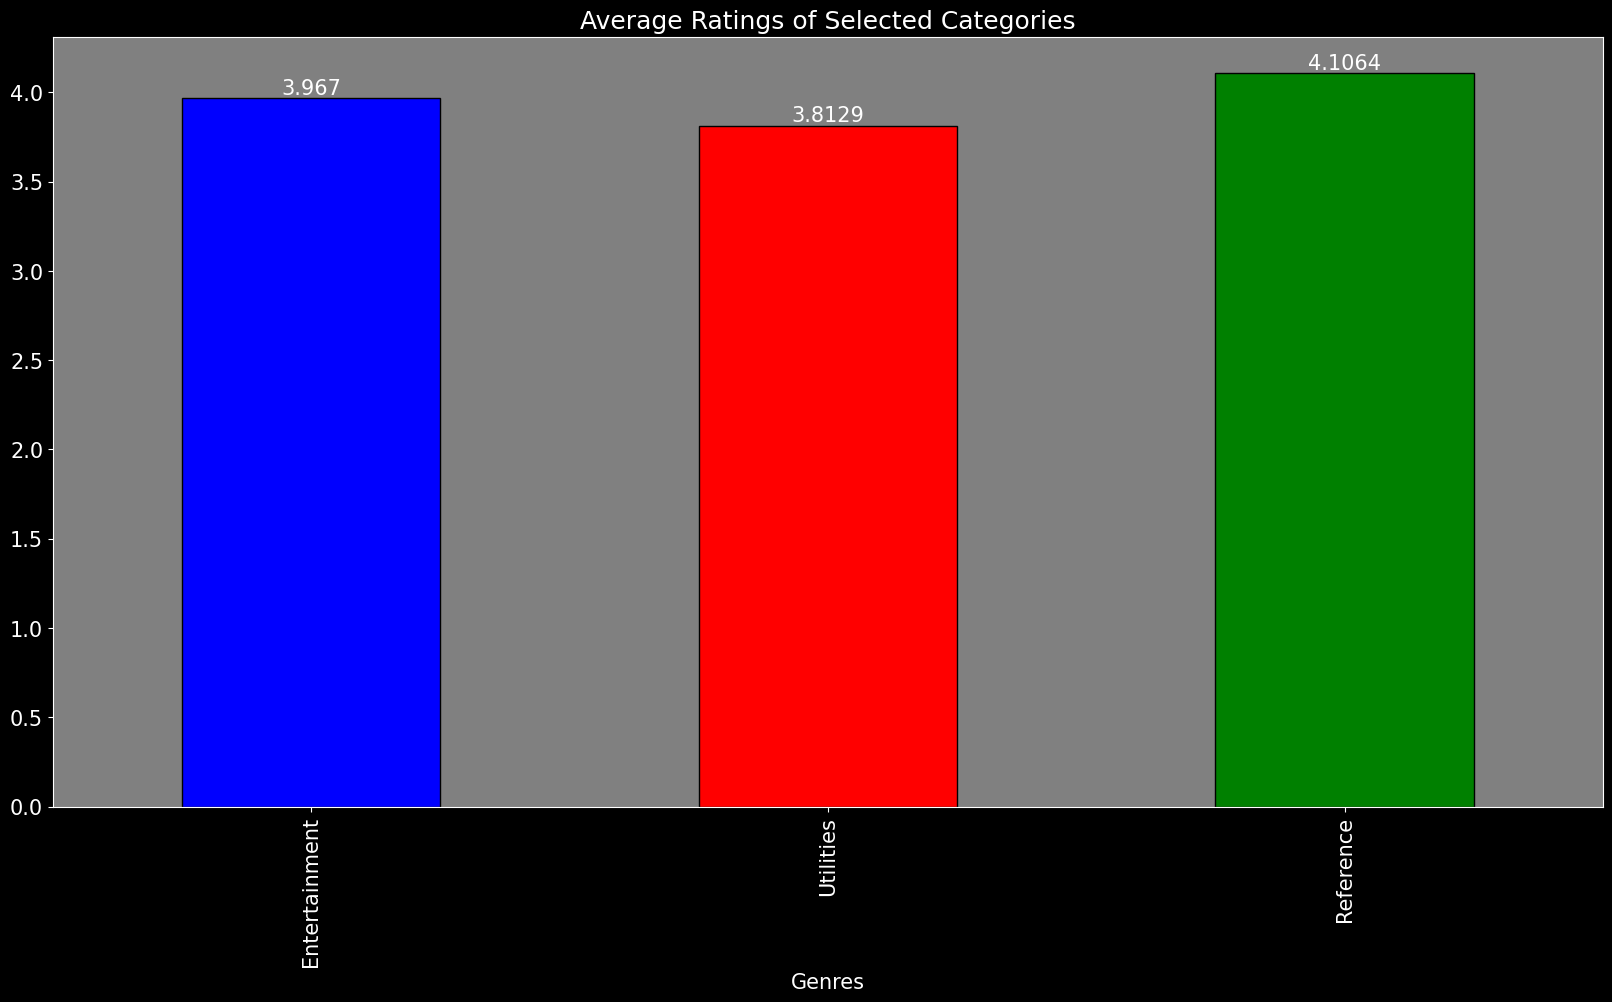

In [74]:
genre_ratings('Entertainment', 'Utilities', 'Reference')

genre_dic = {'Genres': [inp1, inp2, inp3],
                'Average Ratings':[average_for_lists(genre1_list, genre1_list), average_for_lists(genre2_list, genre2_list), average_for_lists(genre3_list, genre3_list)]}

genre_df = pd.DataFrame(genre_dic)
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15
## Creates a bar graph using the information from the DataFrame
genre_graph = genre_df.plot(figsize = (20, 10), 
            kind = 'bar',
            title = 'Average Ratings of Selected Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Ratings',
            color = ['blue', 'red', 'green'],
            edgecolor = 'black')
genre_graph.set_facecolor('gray')
genre_graph.bar_label(genre_graph.containers[0]) #Graph labels to display the actual average of the genre

In [ ]:

# Creating list variables to hold iterated data
games_genre_rating = []
business_genre_rating = []
navigation_genre_rating = []
entertainment_genre_rating = []

for row in apps_data[1:]:
    rating = float(row[17])
    genre = row[3]

    if genre == 'Games' and row[17] > '0.0':
        games_genre_rating.append(rating)
    elif genre == 'Business' and row[17] > '0.0':
        business_genre_rating.append(rating)
    elif genre == 'Navigation' and row[17] > '0.0':
        navigation_genre_rating.append(rating)
    elif genre == 'Entertainment' and row[17] > '0.0':
        entertainment_genre_rating.append(rating)

## Creating a graph dictionary to hold the data that I want to display
graph_dict = { 'Genres':['Gaming', 'Business', 'Navigation', 'Entertainment'],
                'Average Rankings':[average_for_lists(sum(games_genre_rating), len(games_genre_rating)), average_for_lists(sum(business_genre_rating), len(business_genre_rating)), average_for_lists(sum(navigation_genre_rating), len(navigation_genre_rating)), average_for_lists(sum(entertainment_genre_rating), len(entertainment_genre_rating))]}

## Creating the DataFrame using the dictionary I created
df = pd.DataFrame(graph_dict)
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15
## Creates a bar graph using the information from the DataFrame
graph = df.plot(figsize = (20, 10), 
            kind = 'bar',
            title = 'Average Ratings of Common Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Rankings',
            color = ['blue', 'red', 'green', 'yellow'],
            edgecolor = 'black')
graph.bar_label(graph.containers[0]) #Graph labels to display the actual average of the genre
graph.set_facecolor('gray')

# Calculating the average price of gaming apps

In [ ]:
price_gaming_apps = []

for row in apps_data[1:]:
    genre = row[3]
    try:
        if float(row[10]) > 0 and genre == 'Games':
            price_gaming_apps.append(float(row[10]))
    except ValueError:
        pass

    
avg_paid_apps = round(sum(price_gaming_apps) / len(price_gaming_apps), 2)
most_expensive_game_app = max(price_gaming_apps)
cheapest_game_app = min(price_gaming_apps)


print("The average price of gaming apps is: " + "$" + str(avg_paid_apps))
print("The most expensive gaming app is: " + "$" + str(most_expensive_game_app))
print("The cheapest gaming app is: " + "$" + str(cheapest_game_app))


## Maybe make a graph showing the max, min and avg price?? I dunno yet